In [36]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [37]:
job_title = 'Data Analyst'
job_country = 'United States'

df_Jobs = df[(df['job_title_short'] == job_title) & (df['job_country'] == job_country)].copy()
df_Jobs.dropna(subset='salary_year_avg', inplace=True)

In [38]:
df_jobs_exploded = df_Jobs.explode('job_skills').copy()
df_jobs_skills = df_jobs_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

top_skills = 10
skill_sal = df_jobs_skills.sort_values(by='median', ascending=False).head(top_skills)
skill_count = df_jobs_skills.sort_values(by='count', ascending=False).head(top_skills).sort_values(by='median', ascending=False)

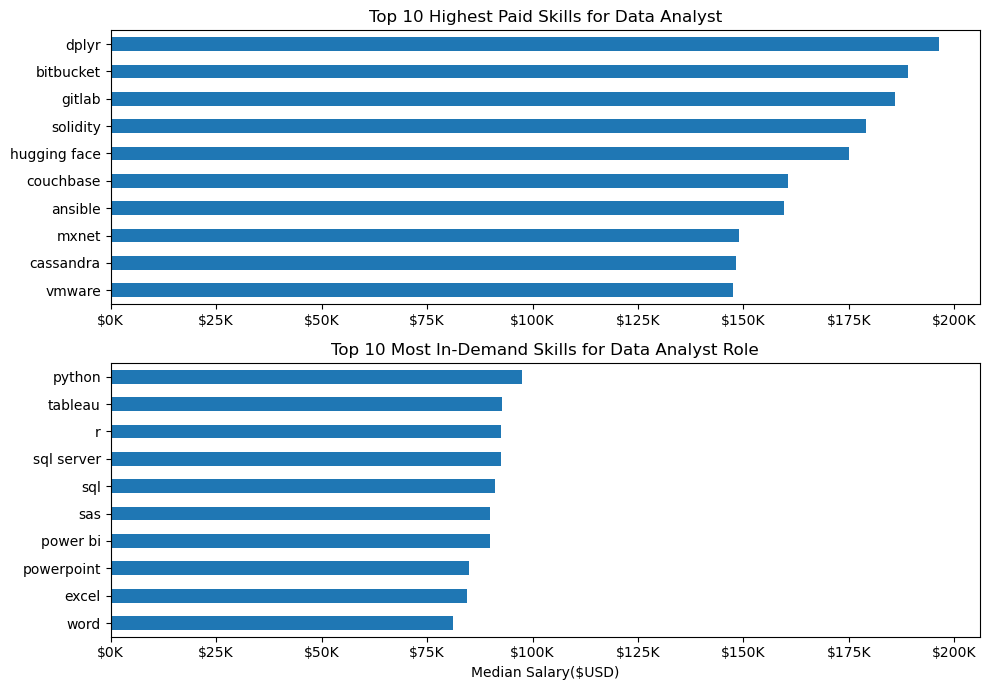

In [69]:
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
skill_sal[::-1].plot(kind='barh', y = 'median', ax = ax[0], legend = False)
ax[0].set_title(f'Top {top_skills} Highest Paid Skills for {job_title}')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
skill_count[::-1].plot(kind='barh', y = 'median', ax = ax[1], legend = False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title(f'Top {top_skills} Most In-Demand Skills for {job_title} Role')
ax[1].set_xlabel('Median Salary($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
fig.tight_layout()